In [99]:
import pandas as pd
import numpy as np
from datetime import time
import math
import folium
# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

In [100]:
people = pd.read_excel('C:/Users/wnrrh/desktop/data/모델링/동별 면적.xlsx',header=0)
df = pd.read_excel('C:/Users/wnrrh/desktop/data/모델링/final_boho.xlsx',header=0)

In [101]:
final = pd.merge(people ,df, on=['자치구','행정동'], how='right')
final

,자치구,행정동,행정동 별 인구,면적_km,인구밀도,시설명,시간대구분,주소,도로명,시설종류,...,피해운전자 차종,피해운전자 연령,사고 수,통행량 도로명,통행량,오전/오후,등하교시간,출퇴근시간,속도준수여부,주변보호구역유무
0,성북구,성북동,17404,2.86,6085,덕수유치원,3,서울특별시 성북구 성북로 127 (성북동),성북로,유치원(일반),...,0.000000,0.000000,0,대사관로(삼청터널),0.000000,0,0,0,0,1
1,성북구,성북동,17404,2.86,6085,서울다원학교,3,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,특수학교,...,0.000000,0.000000,0,대사관로(삼청터널),0.000000,0,0,0,0,1
2,성북구,성북동,17404,2.86,6085,덕수유치원,2,서울특별시 성북구 성북로 127 (성북동),성북로,유치원(일반),...,0.000000,0.000000,0,대사관로(삼청터널),0.000284,0,0,0,0,1
3,성북구,성북동,17404,2.86,6085,서울다원학교,2,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,특수학교,...,0.000000,0.000000,0,대사관로(삼청터널),0.000284,0,0,0,0,1
4,용산구,후암동,18202,0.86,21165,서울후암초등학교,3,서울특별시 용산구 두텁바위로 140,두텁바위로,초등학교,...,0.000000,0.000000,0,소파로(숭의여자대학교),0.000860,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,영등포구,신길4동,12974,0.38,34142,서울우신초등학교,14,서울특별시 영등포구 신길로 190 (신길동),신길로,초등학교,...,2.000000,60.000000,1,경인로(서울교),0.375869,1,1,0,1,1
36236,도봉구,쌍문4동,19297,0.52,37110,선희유치원,20,서울특별시 도봉구 해등로 241 (쌍문동),해등로,유치원(일반),...,4.000000,46.500000,2,도봉로(쌍문역),0.139611,1,0,0,1,1
36237,양천구,신월4동,18487,0.52,35552,서울강서초등학교,19,서울특별시 양천구 오목로 31 (신월동),오목로,초등학교,...,3.000000,66.000000,1,남부순환로(신월IC),0.339756,1,0,1,1,1
36238,영등포구,신길4동,12974,0.38,34142,신길에덴유치원,15,서울특별시 영등포구 신길로38길 21 (신길동),신길로38길,유치원(일반),...,6.000000,31.000000,1,경인로(서울교),0.371547,1,1,0,1,1


In [102]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36240 entries, 0 to 36239
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       36240 non-null  object 
 1   행정동       36240 non-null  object 
 2   행정동 별 인구  36240 non-null  int64  
 3   면적_km     36240 non-null  float64
 4   인구밀도      36240 non-null  int64  
 5   시설명       36240 non-null  object 
 6   시간대구분     36240 non-null  int64  
 7   주소        36240 non-null  object 
 8   도로명       36240 non-null  object 
 9   시설종류      36240 non-null  object 
 10  구역지정수     36240 non-null  int64  
 11  보호구역도로폭   36240 non-null  float64
 12  CCTV설치여부  36240 non-null  int64  
 13  CCTV 수    36240 non-null  int64  
 14  도로표지판 수   36240 non-null  float64
 15  과속방지턱 수   36240 non-null  int64  
 16  위도        36240 non-null  float64
 17  경도        36240 non-null  float64
 18  tmp       36240 non-null  object 
 19  속도        36240 non-null  float64
 20  총생활인구수    36240 non-null  fl

In [103]:
final.to_excel('C:/Users/wnrrh/desktop/data/모델링/real_final.xlsx')

위험도 산정. 통행량은 이미 민맥스 처리되어있음.

In [85]:
# 위험도 산정
final['위험도'] = 0
for i in range(len(final)):
    final.loc[i,'위험도'] = (((final.loc[i,'사망자수'] + final.loc[i,'중상자수']*0.7 + final.loc[i,'경상자수']*0.3 + final.loc[i,'부상신고자수']*0.3))*0.75+(final.loc[i,'통행량'])*0.25)/(final.loc[i,'인구밀도'])*10000

In [87]:
def MinMax(x):
    _max = x.max()
    _min = x.min()
    _denominator = _max - _min
    return (x- _min) / _denominator
final['위험도'] = MinMax(final['위험도'])

C:\Users\wnrrh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '위험도 분포')

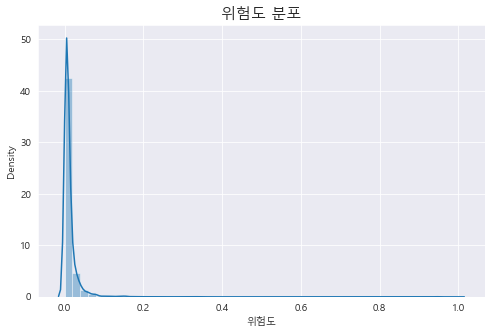

In [88]:
# 산정한 위험도 분포
plt.figure(figsize=(8,5))
sns.distplot(final['위험도'])
plt.title('위험도 분포',fontdict={'fontsize':15})

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from c

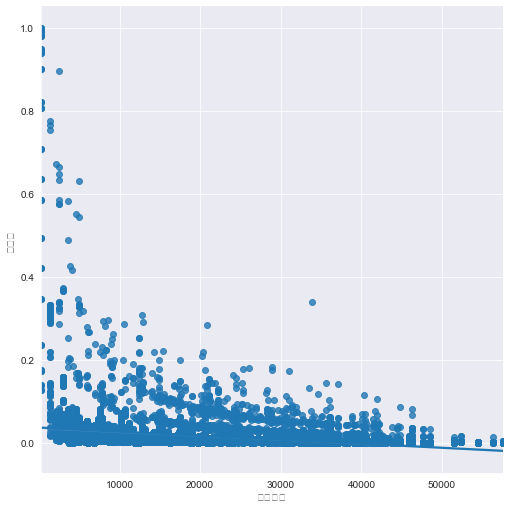

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50669 missing from c

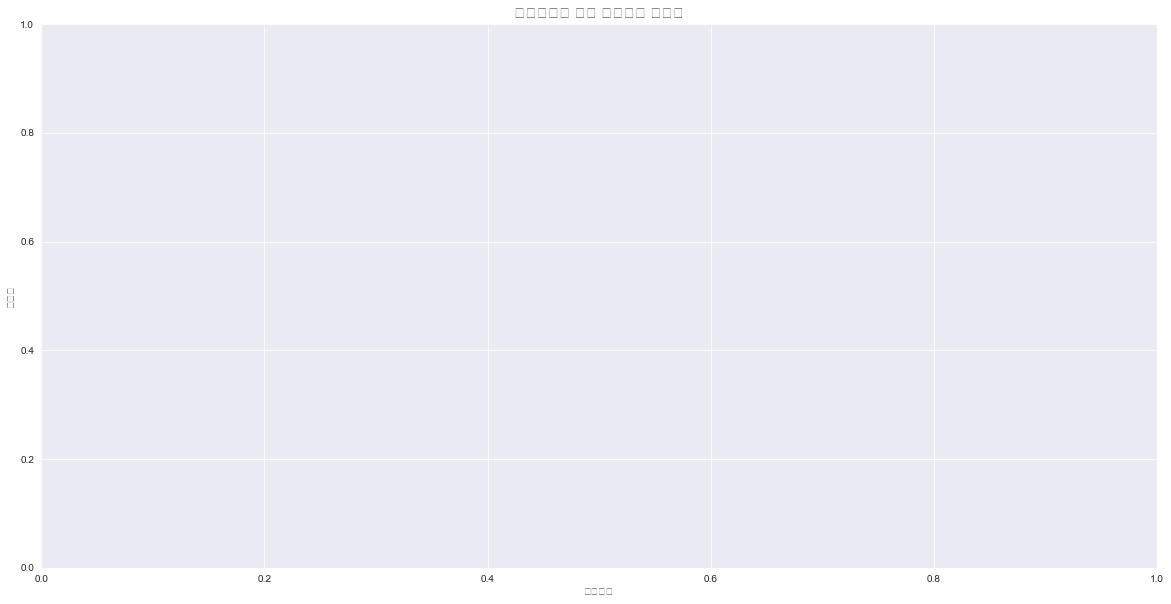

In [90]:
# 인구밀도와 위험도 사이의 상관관계 분석
sns.set_style('darkgrid')
sns.lmplot(x='인구밀도',y='위험도',data=final,height=7)
plt.figure(figsize=(20,10))
plt.xlabel('인구밀도')
plt.ylabel('위험도')
plt.title('인구밀도에 따른 보호구역 위험도',fontdict = {'fontsize':15})
plt.show()

In [ ]:
final['위험도'].describe()

In [94]:
## k-means clustering
from sklearn.cluster import KMeans
features = ['위험도']

X = final[features]
X_train = pd.get_dummies(X)

model = KMeans(n_clusters=3, random_state=0)
model.fit(X_train)
y_pred = model.labels_

final['cluster_label'] = y_pred

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47353 missing from cur

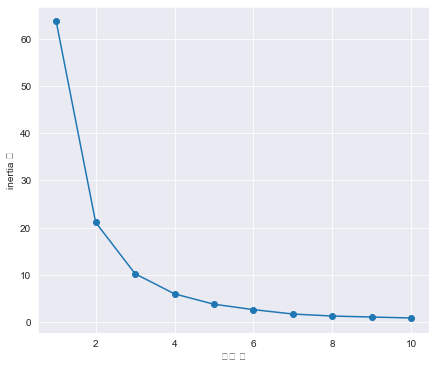

In [95]:
# 군집 수 확인 
inertia_list = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_list.append(model.inertia_)
plt.figure(figsize=(7,6))
plt.plot(range(1,11), inertia_list, marker='o')
plt.xlabel("그룹 수")
plt.ylabel("inertia 값")
plt.show()

In [96]:
print(final['총생활인구수'].corr(final['위험도']))

0.011428270758648417


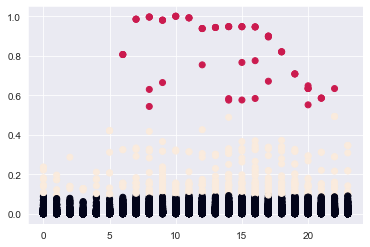

In [97]:
plt.scatter(x = final["시간대구분"], y = final["위험도"], c=y_pred)

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from c

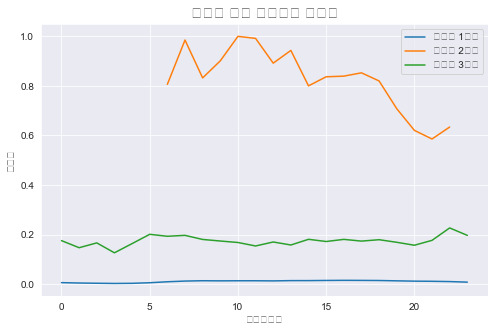

In [98]:
# 클러스터링 결과 시각화
plt.figure(figsize = (8,5))
sns.lineplot(data=final[final['cluster_label']==0],x='시간대구분', y='위험도', ci=None, label='위험도 1단계')
sns.lineplot(data=final[final['cluster_label']==1],x='시간대구분', y='위험도', ci=None, label='위험도 2단계')
sns.lineplot(data=final[final['cluster_label']==2],x='시간대구분', y='위험도', ci=None, label='위험도 3단계')
# sns.lineplot(data=df[df['cluster_label']==3],x='시간대구분', y='위험도', ci=None, label='위험도 4단계')
plt.title('시간에 따른 보호구역 위험도',fontdict = {'fontsize':15})
plt.legend()
plt.show()

In [74]:
# 모델링 라이브러리
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 연속형 변수 
numeric_features = X.select_dtypes("float").columns.to_list()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# 범주형 변수 처리
categorical_features = X.select_dtypes("object").columns.to_list()
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#컬럼 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        # ('cat', categorical_transformer, categorical_features)])
